Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import pickle

Data Collection



In [34]:
gold_data = pd.read_csv('gld_price_data.csv')

Basic EDA

Data Processing

In [35]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [36]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [37]:
gold_data.shape

(2290, 6)

In [38]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [39]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [40]:
gold_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [41]:
gold_data.drop(columns='Date', inplace=True)

Handling Null Values

In [42]:
# checking the number of missing values
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Handling Duplicate Values

In [43]:
gold_data.duplicated().sum()

np.int64(0)

Handling Outliers

<Axes: >

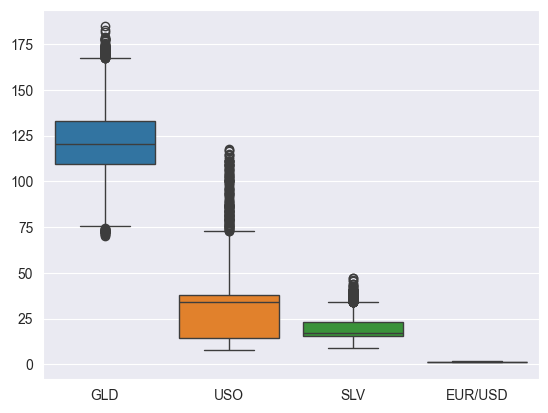

In [44]:
sns.boxplot(gold_data[['GLD','USO','SLV','EUR/USD']])

<Axes: >

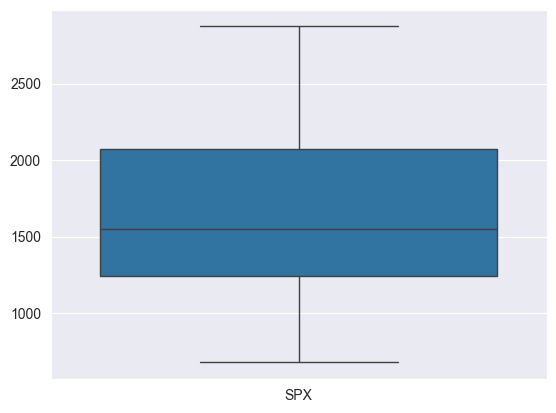

In [45]:
sns.boxplot(gold_data[['SPX']])

In [46]:
gold_data.shape

(2290, 5)

In [47]:
columns_to_clean = ['GLD', 'USO', 'SLV']

for column in columns_to_clean:
    Q1 = gold_data[column].quantile(0.25)
    Q3 = gold_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    gold_data = gold_data[(gold_data[column] >= lower_bound) & (gold_data[column] <= upper_bound)]

print("Outliers removed from the specified columns using the IQR method.")
print("New shape of the data:", gold_data.shape)

Outliers removed from the specified columns using the IQR method.
New shape of the data: (1909, 5)


Data Visualization

Univariate Analysis

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_9044\3622152693.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

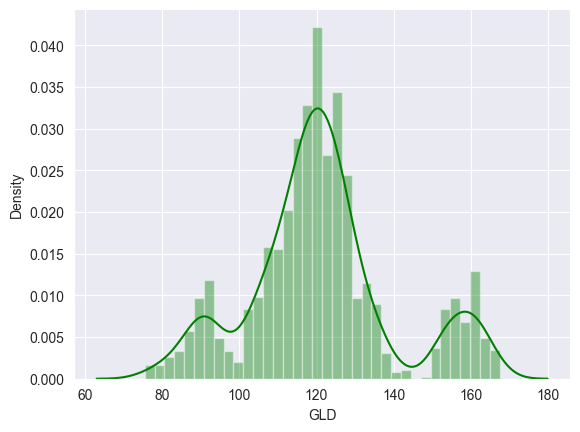

In [48]:
# checking the distribution of the GLD Price (PDF)
sns.distplot(gold_data['GLD'],color='green')

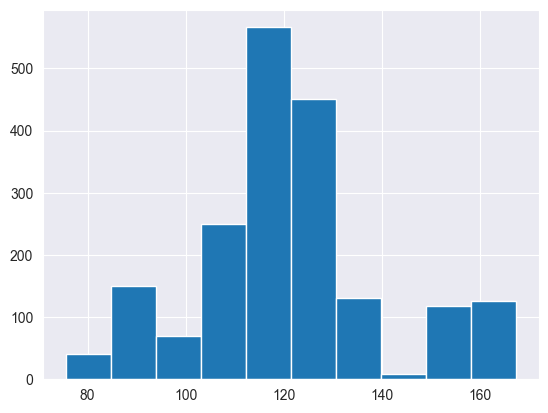

In [49]:
plt.hist(gold_data['GLD'])
plt.show()

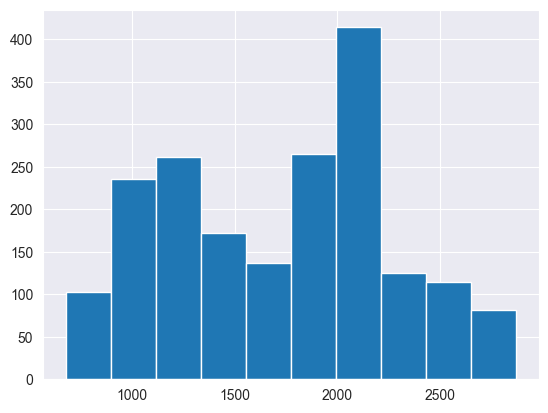

In [50]:
plt.hist(gold_data['SPX'])
plt.show()

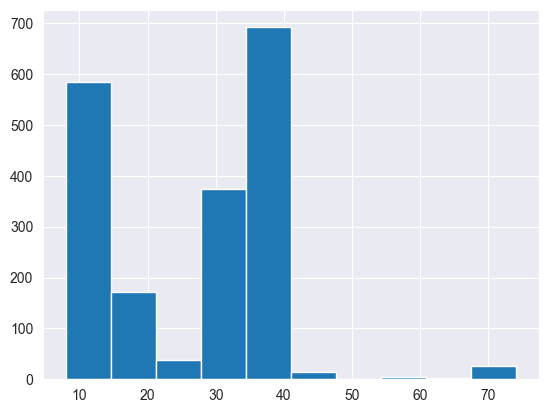

In [51]:
plt.hist(gold_data['USO'])
plt.show()

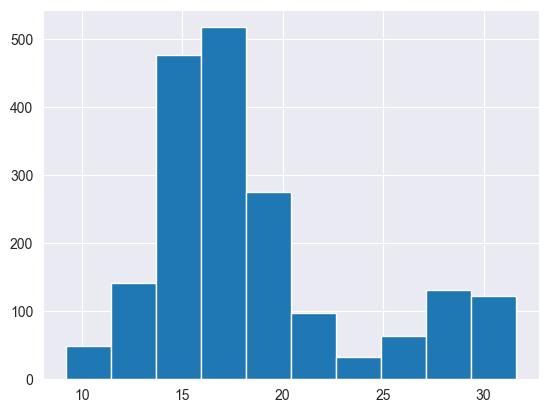

In [52]:
plt.hist(gold_data['SLV'])
plt.show()

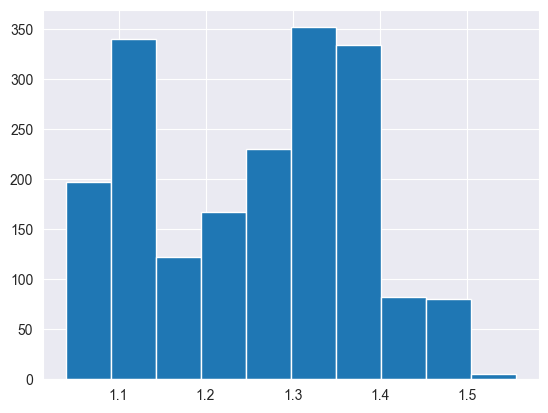

In [53]:
plt.hist(gold_data['EUR/USD'])
plt.show()

Bivariate Analysis

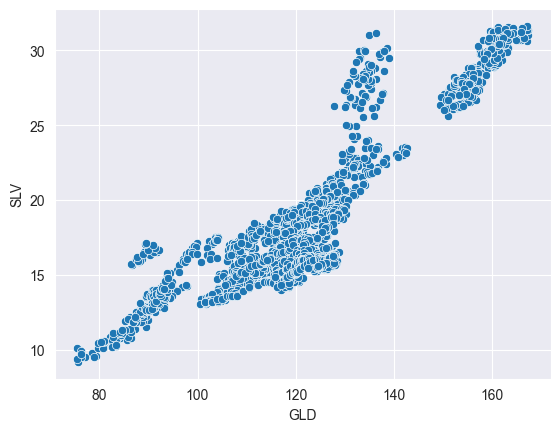

In [54]:
sns.scatterplot(x='GLD', y='SLV', data=gold_data)
plt.show()

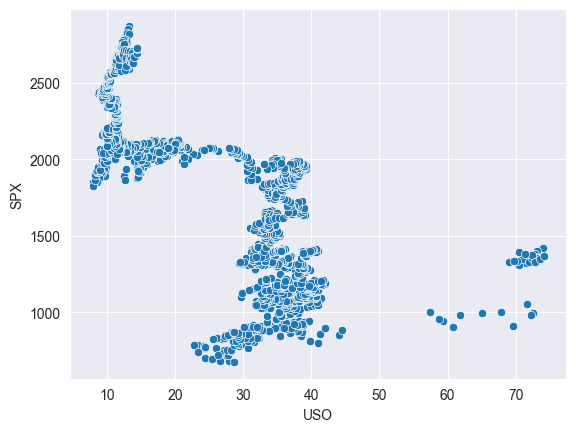

In [55]:
sns.scatterplot(x='USO', y='SPX', data=gold_data)
plt.show()

Multivariate Analysis

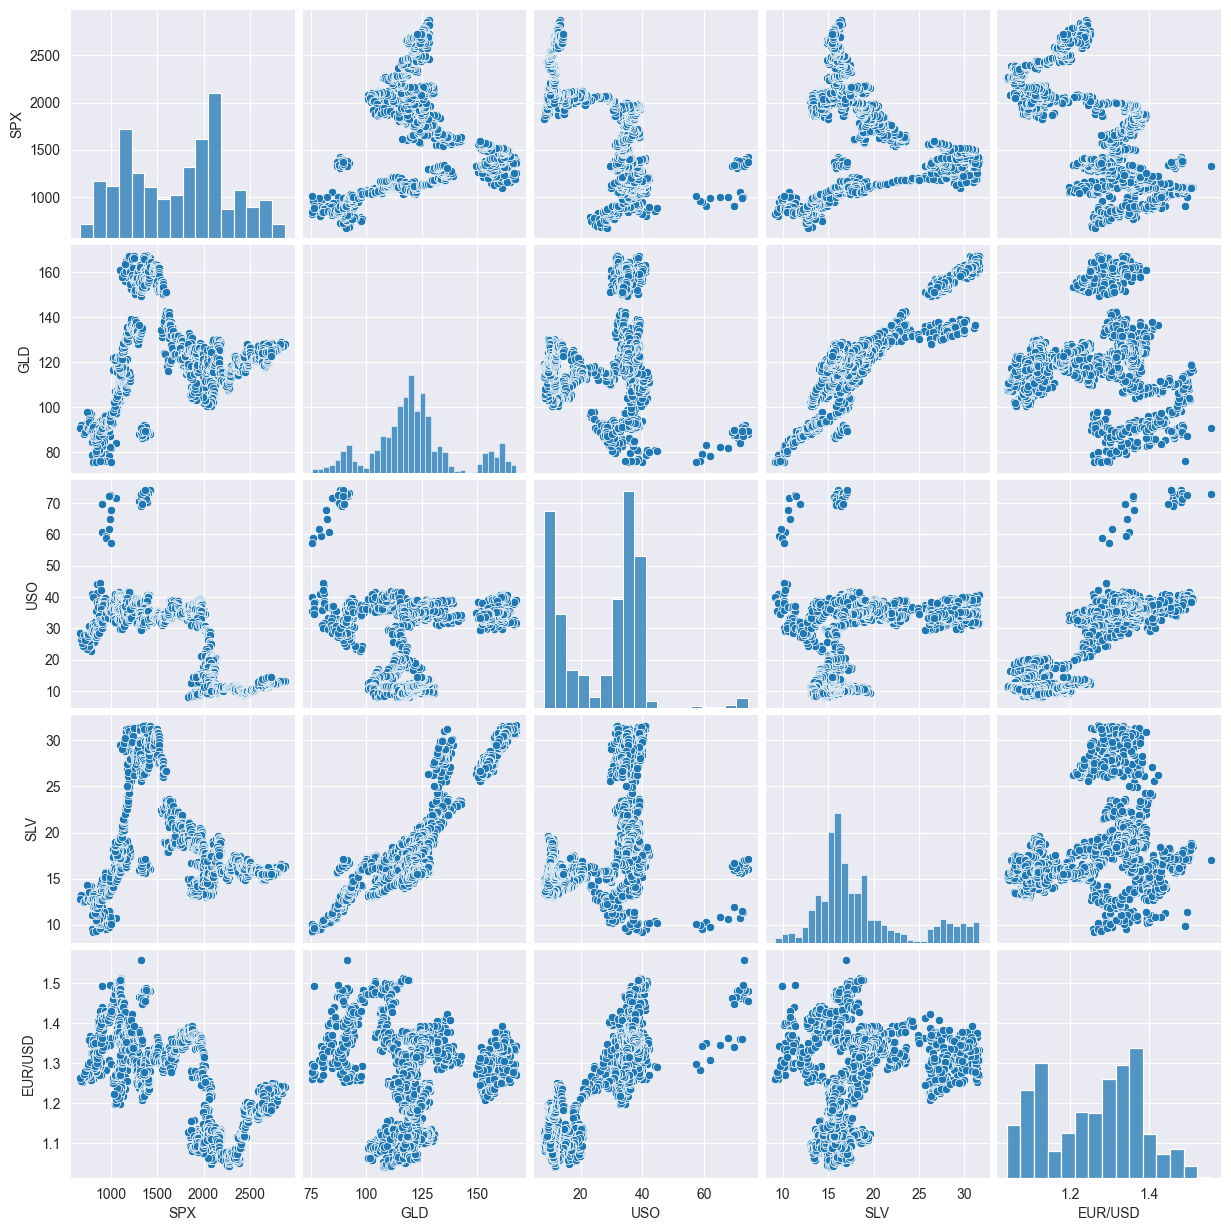

In [56]:
sns.pairplot(gold_data)
plt.show()

In [57]:
correlation = gold_data.corr()

Text(0.5, 1.0, 'Correlation Heatmap of Features')

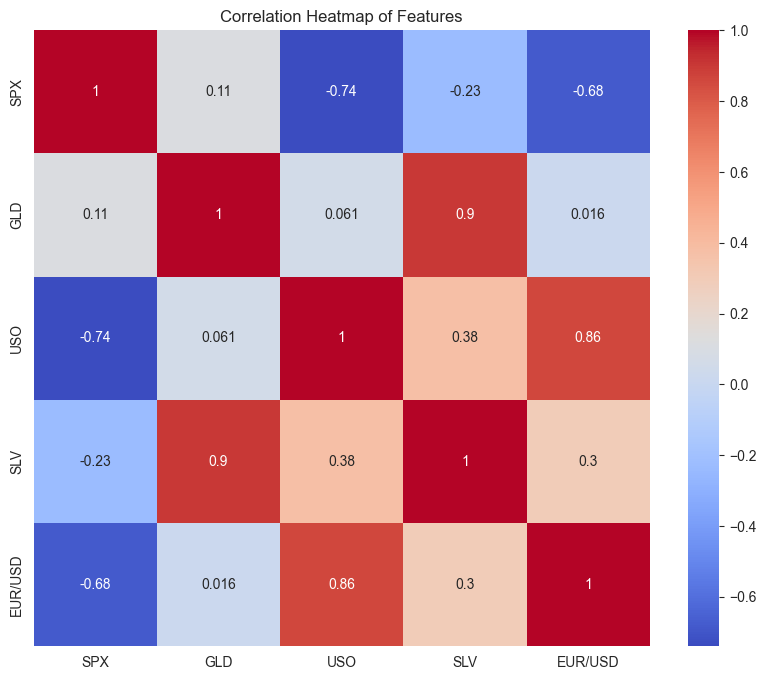

In [58]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation, cbar=True, square=True,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')

Observations

*   GLD and SLV are highly positively correlated
*   USO and EUR/USD are highly positively correlated
*   USO and SPX are highly negatively correlated





In [59]:
print(correlation['GLD'])

SPX        0.114867
GLD        1.000000
USO        0.061477
SLV        0.899127
EUR/USD    0.016016
Name: GLD, dtype: float64


Splitting the Features and Target

In [60]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [61]:
print(X)

              SPX        USO        SLV   EUR/USD
6     1420.329956  74.019997  16.061001  1.480100
7     1401.020020  73.089996  16.077000  1.479006
9     1380.949951  72.779999  15.834000  1.480210
10    1373.199951  71.849998  15.654000  1.466405
11    1333.250000  71.029999  15.717000  1.464000
...           ...        ...        ...       ...
2285  2671.919922  14.060000  15.510000  1.186789
2286  2697.790039  14.370000  15.530000  1.184722
2287  2723.070068  14.410000  15.740000  1.191753
2288  2730.129883  14.380000  15.560000  1.193118
2289  2725.780029  14.405800  15.454200  1.182033

[1909 rows x 4 columns]


In [62]:
print(Y)

6        88.250000
7        88.580002
9        87.989998
10       86.699997
11       86.500000
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 1909, dtype: float64


Splitting into Training data and Test Data

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Model Training:
Random Forest Regressor

In [64]:
regressor = RandomForestRegressor(n_estimators=100)

In [65]:
# training the model
regressor.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
train_data_prediction = regressor.predict(X_train)

In [67]:
print("Performance on Training Dataset")
mse = mean_squared_error(Y_train, train_data_prediction)
r2 = r2_score(Y_train, train_data_prediction)
print(f"MSE: {mse:.4f}")
print(f"R2_Score : {r2:.4f}")

Performance on Training Dataset
MSE: 0.6496
R2_Score : 0.9982


Model Evaluation

In [68]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [69]:
mae = mean_absolute_error(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, test_data_prediction)

print("Performance on Testing Dataset")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2_Score: {r2:.4f}")

Performance on Testing Dataset
MAE: 1.1305
MSE: 3.5707
RMSE: 1.8896
R2_Score: 0.9902




*   R2_Score on Traning Dataset -> 0.9980
*   R2_Score on Testing Dataset -> 0.9847

So there is no overfitting





Hyperparameter Tuning for **Random Forest Regressor**

In [70]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, Y_train)

# Best parameters
print("Best parameters found for Random Forest Regressor: ", grid_search_rf.best_params_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test data
best_rf_prediction = best_rf_model.predict(X_test)
best_rf_mae = mean_absolute_error(Y_test, best_rf_prediction)
best_rf_mse = mean_squared_error(Y_test, best_rf_prediction)
best_rf_r2 = r2_score(Y_test, best_rf_prediction)

print("\nTuned Random Forest Regressor Performance")
print(f"Mean Squared Error (MSE): {best_rf_mse:.2f}")
print(f"R-squared (R2): {best_rf_r2:.4f}")

Best parameters found for Random Forest Regressor:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Regressor Performance
Mean Squared Error (MSE): 3.89
R-squared (R2): 0.9894


After Hyperparameter Tuning

---


R2_Score -  0.9847 -->  0.9894

Compare the Actual Values and Predicted Values in a Plot after Hyperparameter Tuning

In [71]:
Y_test = list(Y_test)

In [72]:
gold_data.shape

(1909, 5)

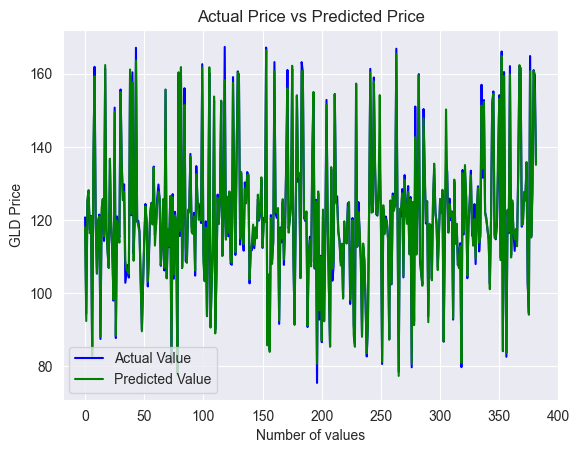

In [73]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(best_rf_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [74]:
# Save the trained model as a pickle file
with open('gold_price_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

print("Model has been trained and saved as 'gold_price_model.pkl' successfully.")

Model has been trained and saved as 'gold_price_model.pkl' successfully.


In [75]:
# Get input values from the user
spx_value = float(input("Enter SPX value: "))
uso_value = float(input("Enter USO value: "))
slv_value = float(input("Enter SLV value: "))
eurusd_value = float(input("Enter EUR/USD value: "))

# Create a DataFrame with the input values
input_data = pd.DataFrame({
    'SPX': [spx_value],
    'USO': [uso_value],
    'SLV': [slv_value],
    'EUR/USD': [eurusd_value]
})

# Predict the GLD price
predicted_gld_price = regressor.predict(input_data)

# Display the predicted GLD price
print(f"Predicted GLD Price: {predicted_gld_price[0]:.2f}")

Predicted GLD Price: 76.91


Applying two more regression algorithms to the existing model for predicting GLD prices, evaluate their performance, and compare them to the current Random Forest Regressor model.

## Algorithms:


*   Linear Regression
*   Gradient Boosting Regressor



In [76]:
# Linear Regression is a good choice because it is a simple and interpretable model that can be used as a baseline.
# Gradient Boosting Regressor is a powerful ensemble method that can capture complex relationships in the data.

In [77]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [78]:
lr_test_data_prediction = linear_regressor.predict(X_test)

# Evaluate Linear Regression
lr_mae = mean_absolute_error(Y_test, lr_test_data_prediction)
lr_mse = mean_squared_error(Y_test, lr_test_data_prediction)
lr_r2 = r2_score(Y_test, lr_test_data_prediction)

print("Linear Regression Performance")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"R-squared (R2): {lr_r2:.4f}")
print("\n")

gb_test_data_prediction = gb_regressor.predict(X_test)

# Evaluate Gradient Boosting Regressor
gb_mae = mean_absolute_error(Y_test, gb_test_data_prediction)
gb_mse = mean_squared_error(Y_test, gb_test_data_prediction)
gb_r2 = r2_score(Y_test, gb_test_data_prediction)

print("Gradient Boosting Regressor Performance")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"R-squared (R2): {gb_r2:.4f}")

Linear Regression Performance
Mean Absolute Error (MAE): 3.70
Mean Squared Error (MSE): 28.36
R-squared (R2): 0.9224


Gradient Boosting Regressor Performance
Mean Absolute Error (MAE): 1.96
Mean Squared Error (MSE): 9.03
R-squared (R2): 0.9753


Hyperparameter Tuning for **Gradient Boosting Regressor**

In [79]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

# Best parameters
print("Best parameters found for Gradient Boosting Regressor: ", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test data
best_gb_prediction = best_gb_model.predict(X_test)
best_gb_mae = mean_absolute_error(Y_test, best_gb_prediction)
best_gb_mse = mean_squared_error(Y_test, best_gb_prediction)
best_gb_r2 = r2_score(Y_test, best_gb_prediction)

print("\nTuned Gradient Boosting Regressor Performance")
print(f"Mean Absolute Error (MAE): {best_gb_mae:.2f}")
print(f"Mean Squared Error (MSE): {best_gb_mse:.2f}")
print(f"R-squared (R2): {best_gb_r2:.4f}")

Best parameters found for Gradient Boosting Regressor:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Gradient Boosting Regressor Performance
Mean Absolute Error (MAE): 1.53
Mean Squared Error (MSE): 5.80
R-squared (R2): 0.9841


After Hyperparameter Tuning

---


R2_Score -  0.9753  -->  0.9842

Compare the evaluation metrics of the new models with the Random Forest Regressor to determine which algorithm performs best.


In [80]:
best_rf_mae = mean_absolute_error(Y_test, best_rf_prediction)
best_rf_mse = mean_squared_error(Y_test, best_rf_prediction)
best_rf_r2 = r2_score(Y_test, best_rf_prediction)

best_gb_mae = mean_absolute_error(Y_test, best_gb_prediction)
best_gb_mse = mean_squared_error(Y_test, best_gb_prediction)
best_gb_r2 = r2_score(Y_test, best_gb_prediction)

In [81]:
print("Random Forest Regressor Performance")
print(f"Mean Absolute Error (MAE): {best_rf_mae:.2f}")
print(f"Mean Squared Error (MSE): {best_rf_mse:.2f}")
print(f"R-squared (R2): {best_rf_r2:.4f}")
print("\n")

print("Linear Regression Performance")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"R-squared (R2): {lr_r2:.4f}")
print("\n")

print("Gradient Boosting Regressor Performance")
print(f"Mean Absolute Error (MAE): {best_gb_mae:.2f}")
print(f"Mean Squared Error (MSE): {best_gb_mse:.2f}")
print(f"R-squared (R2): {best_gb_r2:.4f}")
print("\n")


# Compare R-squared values to determine the best model
if best_rf_r2 > lr_r2 and best_rf_r2 > best_gb_r2:
    print("Random Forest Regressor performed best with the highest R-squared score.")
elif lr_r2 > best_rf_r2 and lr_r2 > best_gb_r2:
    print("Linear Regression performed best with the highest R-squared score.")
else:
    print("Gradient Boosting Regressor performed best with the highest R-squared score.")

Random Forest Regressor Performance
Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 3.89
R-squared (R2): 0.9894


Linear Regression Performance
Mean Absolute Error (MAE): 3.70
Mean Squared Error (MSE): 28.36
R-squared (R2): 0.9224


Gradient Boosting Regressor Performance
Mean Absolute Error (MAE): 1.53
Mean Squared Error (MSE): 5.80
R-squared (R2): 0.9841


Random Forest Regressor performed best with the highest R-squared score.


## Summary:

### Data Analysis Key Findings

*   Linear Regression achieved an R-squared of 0.9224, a Mean Absolute Error (MAE) of 3.70, and a Mean Squared Error (MSE) of 28.36.
*   Gradient Boosting Regressor achieved an R-squared of 0.9842, an MAE of 1.53, and an MSE of 5.80.
*   Comparing the R-squared values, the Random Forest Regressor performed best with an R-squared of 0.9894, followed by the Gradient Boosting Regressor (0.9842), and then Linear Regression (0.9224).

### Insights

*   While Gradient Boosting Regressor shows promising performance and is significantly better than Linear Regression, the existing Random Forest Regressor model currently provides the most accurate predictions based on the R-squared metric.
